<a href="https://colab.research.google.com/github/ayushiiii28/DataSet/blob/main/Avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pickle

In [4]:
# Load dataset
data = pd.read_csv('/content/avocado.csv')
data = data.drop(columns=['Unnamed: 0'])


In [5]:
# Step 2: Exploratory Data Analysis (EDA)
print(data.info())
print(data.describe())
data['Date'] = pd.to_datetime(data['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB
None
       AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  

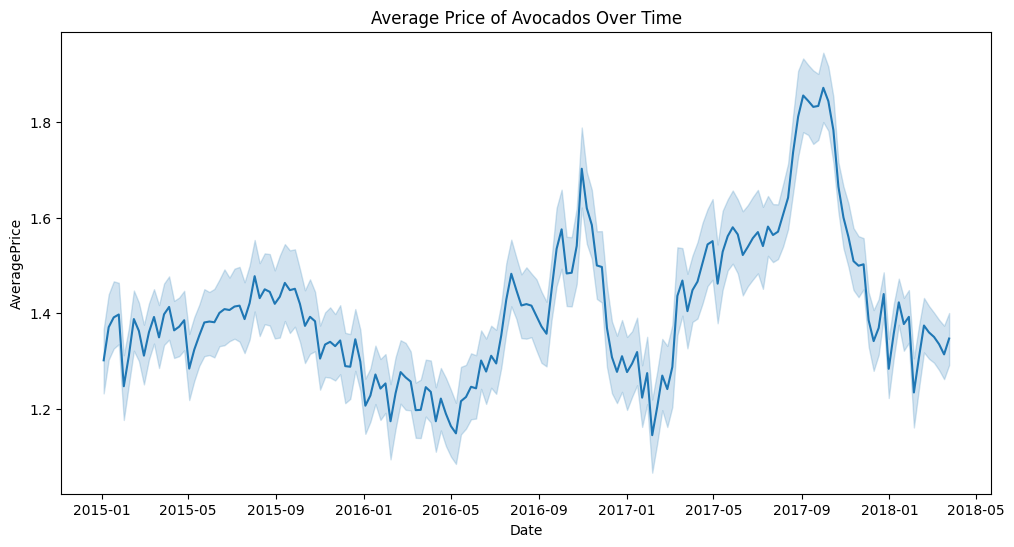

In [6]:
# Visualization - AveragePrice over time
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Date', y='AveragePrice')
plt.title('Average Price of Avocados Over Time')
plt.show()

In [7]:
# Step 3: Data Preprocessing
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [8]:
# Encoding categorical features
le_type = LabelEncoder()
data['type'] = le_type.fit_transform(data['type'])

le_region = LabelEncoder()
data['region'] = le_region.fit_transform(data['region'])

In [9]:
# Step 4: Split Data
# Regression task (predicting AveragePrice)
X_reg = data.drop(columns=['AveragePrice', 'Date', 'region'])
y_reg = data['AveragePrice']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [10]:
# Classification task (predicting region)
X_class = data.drop(columns=['Date', 'region'])
y_class = data['region']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [12]:
# Step 5: Model Building and Training
# Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)
print("Regression MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Regression R2 Score:", r2_score(y_test_reg, y_pred_reg))

Regression MAE: 0.2329713329167273
Regression R2 Score: 0.4330705934671034


In [13]:
# Classification Model
clf_model = RandomForestClassifier()
clf_model.fit(X_train_class, y_train_class)
y_pred_class = clf_model.predict(X_test_class)
print("Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class, target_names=le_region.classes_))

Classification Accuracy: 0.9120547945205479
                     precision    recall  f1-score   support

             Albany       0.88      0.97      0.92        63
            Atlanta       0.86      0.82      0.84        73
BaltimoreWashington       0.98      0.98      0.98        61
              Boise       0.91      0.86      0.89        72
             Boston       0.89      0.96      0.92        67
   BuffaloRochester       0.90      0.82      0.86        73
         California       1.00      1.00      1.00        62
          Charlotte       0.93      0.88      0.91        76
            Chicago       0.97      0.99      0.98        72
   CincinnatiDayton       0.92      0.89      0.91        65
           Columbus       0.89      0.89      0.89        65
      DallasFtWorth       0.96      0.97      0.96        68
             Denver       0.95      0.95      0.95        65
            Detroit       0.85      0.88      0.87        66
        GrandRapids       0.91      0.96

In [14]:
# Save both models to pickle files
with open('avocado_regression_model.pkl', 'wb') as f:
    pickle.dump(reg_model, f)

with open('avocado_classification_model.pkl', 'wb') as f:
    pickle.dump(clf_model, f)

print("Models saved as 'avocado_regression_model.pkl' and 'avocado_classification_model.pkl'")

Models saved as 'avocado_regression_model.pkl' and 'avocado_classification_model.pkl'
